In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
df1 = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq='MS'

df2 = pd.read_csv('DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq='D'

In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
from pandas.plotting import lag_plot

In [5]:
lag_plot(df1['Thousands of Passengers'])

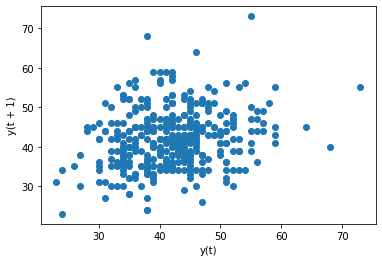

In [6]:
lag_plot(df2['Births'])

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [8]:
acf(df1['Thousands of Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

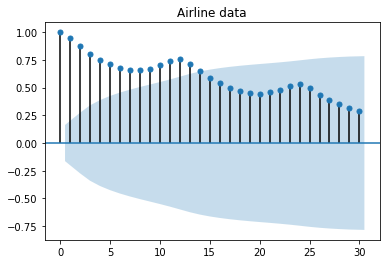

In [9]:
plot_acf(df1['Thousands of Passengers'], title='Airline data', lags=30);

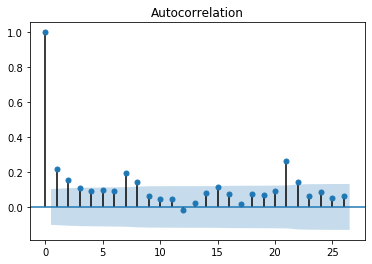

In [10]:
plot_acf(df2['Births']);

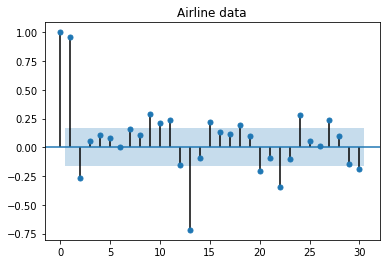

In [11]:
plot_pacf(df1, title='Airline data', lags=30);

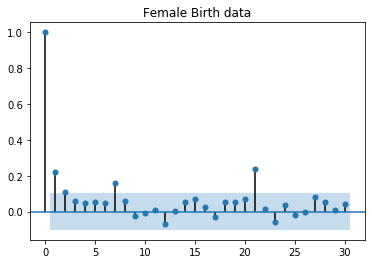

In [12]:
plot_pacf(df2, title='Female Birth data', lags=30);

In [13]:
from statsmodels.tsa.statespace.tools import diff

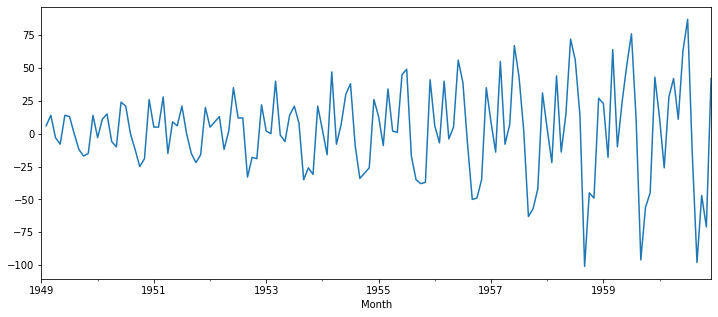

In [14]:
df1['d1'] = diff(df1['Thousands of Passengers'], k_diff=1)
df1['d1'].plot(figsize=(12,5));

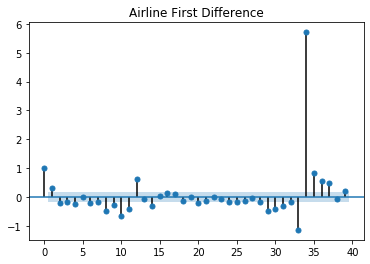

In [15]:
plot_pacf(df1['d1'].dropna(), title='Airline First Difference', 
          lags=np.arange(40));

Autoregressive model 1 $$y(n) = a + b*y(n-1) + noise(n)$$ Autoregressive model 2 $$y(n) = a + b1*y(n-1) + b2*y(n-2)+ noise(n)$$

In [17]:
from statsmodels.tsa.ar_model import AR, ARResults
df = pd.read_csv('uspopulation.csv', index_col='DATE', parse_dates=True)
df.index.freqs='MS'

In [18]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [19]:
df.tail()

,PopEst
DATE,
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077
2018-11-01,328241
2018-12-01,328393


In [20]:
len(df)

96

[Text(0, 0.5, 'Population'), Text(0.5, 0, '')]

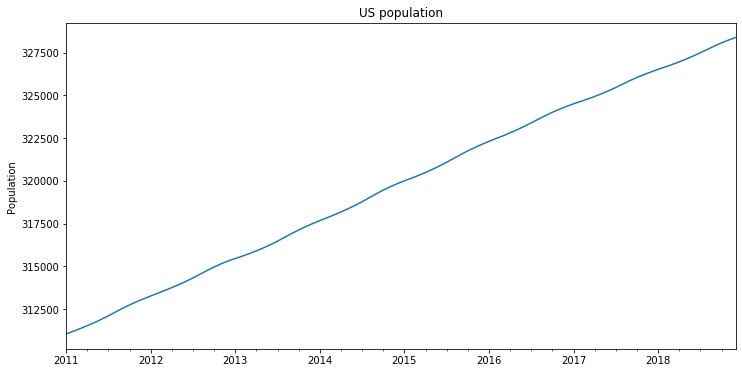

In [21]:
title = 'US population'
ylabel = 'Population'
xlabel = ''

ax = df['PopEst'].plot(figsize=(12,6), title=title);
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [25]:
train = df.iloc[:12*7]
test = df.iloc[12*7:]
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1, method='mle')

print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients: \n{AR1fit.params}')

Lag: 1
Coefficients: 
const        218.270410
L1.PopEst      0.999313
dtype: float64


In [28]:
start = len(train)
end = len(train) + len(test) - 1
predictions1 = AR1fit.predict(start=start, end=end, 
                              dynamic=False).rename('AR(1) Predictions')

In [29]:
predictions1

2018-01-01    326372.104523
2018-02-01    326366.213096
2018-03-01    326360.325715
2018-04-01    326354.442377
2018-05-01    326348.563081
2018-06-01    326342.687822
2018-07-01    326336.816599
2018-08-01    326330.949408
2018-09-01    326325.086247
2018-10-01    326319.227113
2018-11-01    326313.372004
2018-12-01    326307.520915
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [32]:
for i in range(len(predictions1)):
    print(f'Predicted = {predictions1[i]:<11.10}, expected = {test["PopEst"][i]}')

Predicted = 326372.1045, expected = 326527
Predicted = 326366.2131, expected = 326669
Predicted = 326360.3257, expected = 326812
Predicted = 326354.4424, expected = 326968
Predicted = 326348.5631, expected = 327134
Predicted = 326342.6878, expected = 327312
Predicted = 326336.8166, expected = 327502
Predicted = 326330.9494, expected = 327698
Predicted = 326325.0862, expected = 327893
Predicted = 326319.2271, expected = 328077
Predicted = 326313.372 , expected = 328241
Predicted = 326307.5209, expected = 328393


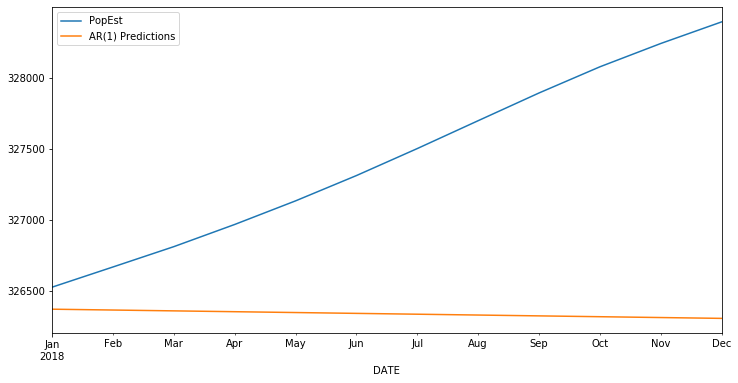

In [33]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True, figsize=(12,6))

In [35]:
AR2fit = model.fit(maxlag=2, method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients: \n{AR2fit.params}')

Lag: 2
Coefficients: 
const        130.109868
L1.PopEst      1.996267
L2.PopEst     -0.996676
dtype: float64


In [36]:
start = len(train)
end = len(train) + len(test) - 1
predictions2 = AR2fit.predict(start=start, end=end, 
                              dynamic=False).rename('AR(2) Predictions')
predictions2

2018-01-01    326530.315542
2018-02-01    326678.896677
2018-03-01    326823.695147
2018-04-01    326964.664398
2018-05-01    327101.759596
2018-06-01    327234.937636
2018-07-01    327364.157158
2018-08-01    327489.378555
2018-09-01    327610.563984
2018-10-01    327727.677376
2018-11-01    327840.684444
2018-12-01    327949.552695
Freq: MS, Name: AR(2) Predictions, dtype: float64

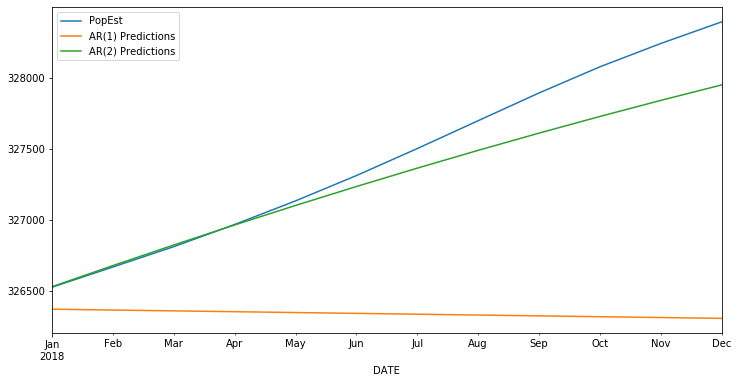

In [38]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True, figsize=(12,6))

In [40]:
AR11fit = model.fit(method='mle')
print(f'Lag: {AR11fit.k_ar}')
print(f'Coefficients: \n{AR11fit.params}')

Lag: 11
Coefficients: 
const         96.148310
L1.PopEst      2.259750
L2.PopEst     -2.083569
L3.PopEst      1.596112
L4.PopEst     -1.287019
L5.PopEst      0.827007
L6.PopEst     -0.867290
L7.PopEst      0.844921
L8.PopEst     -0.293341
L9.PopEst      0.195622
L10.PopEst    -0.125081
L11.PopEst    -0.067416
dtype: float64


In [41]:
start = len(train)
end = len(train) + len(test) - 1
predictions11 = AR11fit.predict(start=start, end=end, 
                              dynamic=False).rename('AR(11) Predictions')
predictions11

2018-01-01    326521.474039
2018-02-01    326652.598353
2018-03-01    326781.143581
2018-04-01    326916.905038
2018-05-01    327067.581281
2018-06-01    327232.933543
2018-07-01    327408.898116
2018-08-01    327591.761552
2018-09-01    327774.672411
2018-10-01    327949.284854
2018-11-01    328108.414561
2018-12-01    328249.461937
Freq: MS, Name: AR(11) Predictions, dtype: float64

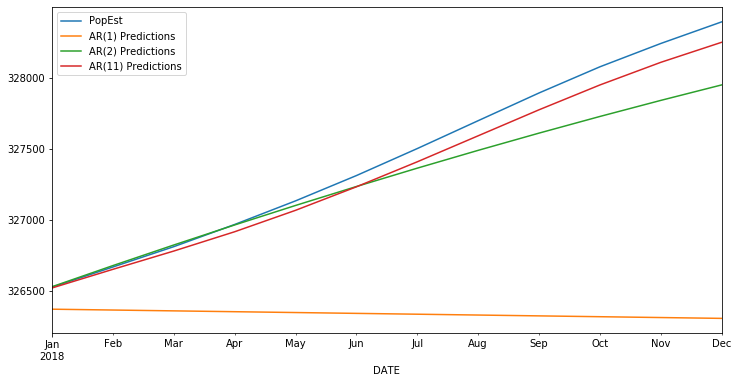

In [44]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True, figsize=(12,6))

In [45]:
from sklearn.metrics import mean_squared_error
labels = ['AR(1)', 'AR(2)', 'AR(11)']
preds = [predictions1, predictions2, predictions11]
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1591015.319
AR(2) Error: 52371.07527
AR(11) Error: 8581.211201


# Forecasting

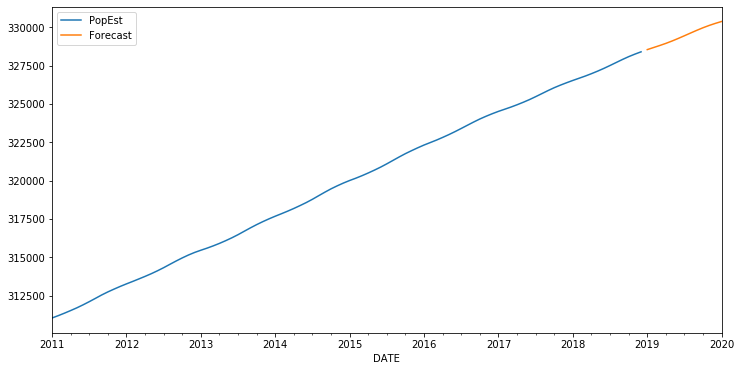

In [47]:
model = AR(df['PopEst'])
ARfit = model.fit(maxlag=11, method='mle')
fcast = ARfit.predict(start=len(df), end=len(df) + 12, dynamic=False).rename('Forecast')
df['PopEst'].plot(legend=True)
fcast.plot(legend=True, figsize=(12,6))

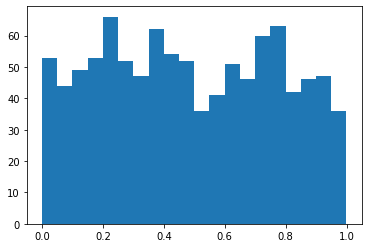

In [51]:
import matplotlib.pyplot as plt
num_samples = 1000
num_bins = 20
white_noise = np.random.random(size=num_samples)
plt.hist(white_noise, num_bins)
plt.show()

In [52]:
pd.Series(white_noise).describe()

count    1000.000000
mean        0.486305
std         0.283864
min         0.000235
25%         0.238026
50%         0.469013
75%         0.734110
max         0.999101
dtype: float64

# Homework
1) Generate AR(n) models for n=1 to 5 with arbitrary parameters

2) Calculate pcaf for each n

3) Use AR model on the generated data

In [81]:
a = 2
b1 = 0.3
b2 = -0.12
b3 = 0.48
b4 = -0.85
b5 = 0.74

AR1 = np.zeros(num_samples)
AR2 = np.zeros(num_samples)
AR3 = np.zeros(num_samples)
AR4 = np.zeros(num_samples)
AR5 = np.zeros(num_samples)

for i in range(1, num_samples):
    AR1[i] = a + b1*AR1[i-1] + white_noise[i]
    AR2[i] = a + b1*AR2[i-1] + b2*AR2[i-2] + white_noise[i]
    AR3[i] = a + b1*AR3[i-1] + b2*AR3[i-2] + b3*AR3[i-3] + white_noise[i]
    AR4[i] = a + b1*AR4[i-1] + b2*AR4[i-2] + b3*AR4[i-3] + b4*AR4[i-4] + white_noise[i]
    AR5[i] = a + b1*AR5[i-1] + b2*AR5[i-2] + b3*AR5[i-3] + b4*AR5[i-4] + b5*AR5[i-5] + white_noise[i]

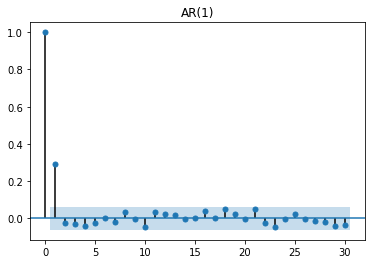

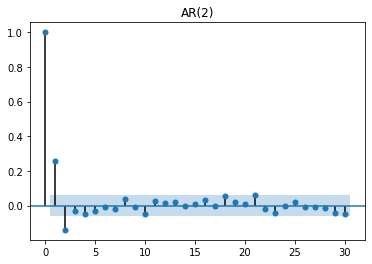

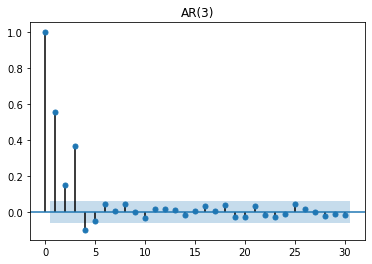

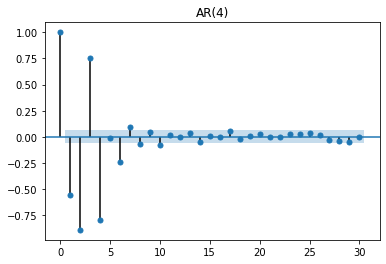

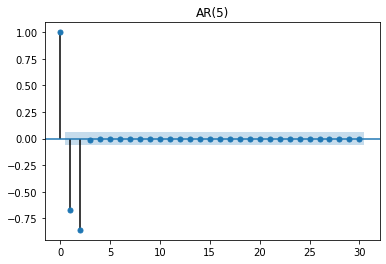

In [86]:
plot_pacf(AR1, title='AR(1)');
plot_pacf(AR2, title='AR(2)');
plot_pacf(AR3, title='AR(3)');
plot_pacf(AR4, title='AR(4)');
plot_pacf(AR5, title='AR(5)');

In [93]:
for i in range(5):
    model = AR(AR1)
    ARfit = model.fit(maxlag=i+1, method='mle')
    print(f'===========================\nAR' + str(i+1))
    print(f'Lag: {ARfit.k_ar}')
    print(f'Coefficients: \n{ARfit.params}')
    
print(f'True components')
print(f'a: {a}, b1: {b1}, b2: {b2}, b3: {b3}, b4: {b4}, b5: {b5}')

AR1
Lag: 1
Coefficients: 
[2.36139663 0.33375349]
AR2
Lag: 2
Coefficients: 
[ 2.45277791  0.34533803 -0.03731892]
AR3
Lag: 3
Coefficients: 
[ 2.53021526  0.34404437 -0.02751613 -0.03031414]
AR4
Lag: 4
Coefficients: 
[ 2.65113479  0.34244401 -0.02905    -0.01555689 -0.04567627]
AR5
Lag: 5
Coefficients: 
[ 2.7161203   0.3409949  -0.02946425 -0.01636126 -0.03835558 -0.02295252]
True components
a: 2, b1: 0.3, b2: -0.12, b3: 0.48, b4: -0.85, b5: 0.74
